# **Loan Default Prediction**


## **Problem Definition**

### **The Context:**

- Why is this problem important to solve?

### **The objective:**

- What is the intended goal?

### **The key questions:**

- What are the key questions that need to be answered?

### **The problem formulation**:

- What is it that we are trying to solve using data science?


## **Data Description:**

The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.

- **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

- **LOAN:** Amount of loan approved.

- **MORTDUE:** Amount due on the existing mortgage.

- **VALUE:** Current value of the property.

- **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

- **JOB:** The type of job that loan applicant has such as manager, self, etc.

- **YOJ:** Years at present job.

- **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

- **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

- **CLAGE:** Age of the oldest credit line in months.

- **NINQ:** Number of recent credit inquiries.

- **CLNO:** Number of existing credit lines.

- **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.


In [1]:
# Mounting the drive
# from google.colab import drive
# drive.mount('/content/drive')

## **Import the necessary libraries and Data**


In [2]:
import warnings
from sklearn.model_selection import GridSearchCV
import scipy.stats as stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()


warnings.filterwarnings("ignore")

## **Data Overview**


- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values


In [3]:
# path='/content/drive/MyDrive/00.capstone/Practical/hmeq.csv'
path = "hmeq.csv"

In [4]:
hm = pd.read_csv(path)
# Copying data to another variable to avoid any changes to original data
data = hm.copy()

In [5]:
# Assuming 'data' is a pandas DataFrame containing your dataset

# Understanding the shape of the dataset
print("Shape of the dataset:")
print(data.shape)
print("\n")

# Checking the data types
print("Data types of each column:")
print(data.dtypes)
print("\n")

# Checking for missing values
print("Missing values in each column:")
print(data.isnull().sum())
print("\n")

# Checking for duplicated values
print("Number of duplicated records:")
print(data.duplicated().sum())

Shape of the dataset:
(5960, 13)


Data types of each column:
BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


Missing values in each column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


Number of duplicated records:
0


In [6]:
cols = data.select_dtypes(["object"]).columns.tolist()

# Adding target variable to this list as this is a classification problem and the target variable is categorical
cols.append("BAD")

# Changing the data type of object type column to category using astype() function
for i in cols:
    data[i] = data[i].astype("category")

# Checking the info again and the datatype of different variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


## Summary Statistics


- Observations from Summary Statistics


## **Exploratory Data Analysis (EDA) and Visualization**


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.


**Leading Questions**:

1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?


### **Univariate Analysis**


In [7]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [8]:
data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [9]:
data.describe(include="all")

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.0,5960.000000,5442.000000,5848.000000,5708,5681,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
unique,2.0,NaN,NaN,NaN,2,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,0.0,NaN,NaN,NaN,DebtCon,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4771.0,NaN,NaN,NaN,3928,2388,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,18607.969799,73760.817200,101776.048741,NaN,NaN,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,NaN,11207.480417,44457.609458,57385.775334,NaN,NaN,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,NaN,1100.000000,2063.000000,8000.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,NaN,11100.000000,46276.000000,66075.500000,NaN,NaN,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,NaN,16300.000000,65019.000000,89235.500000,NaN,NaN,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,NaN,23300.000000,91488.000000,119824.250000,NaN,NaN,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt


def histogram_boxplot(data, feature, figsize=(15, 7), bins=None):
    """
    Custom function for plotting a histogram and a boxplot for a numerical variable,
    with a vertical line indicating the mean and its value.
    """
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.15, 0.85)}, figsize=figsize)
    sns.boxplot(data=data, x=feature, ax=ax_box)
    ax_box.set(xlabel="")
    if bins:
        sns.histplot(data=data, x=feature, ax=ax_hist, bins=bins, kde=True)
    else:
        sns.histplot(data=data, x=feature, ax=ax_hist, kde=True)
    ax_hist.set(ylabel="Frequency")

    # Mean value
    mean_value = data[feature].mean()

    # Add a vertical line for the mean
    ax_hist.axvline(mean_value, color="r", linestyle="--")
    ax_box.axvline(mean_value, color="r", linestyle="--")

    # Annotate the mean value on the plot
    ax_hist.annotate(
        f"Mean: {mean_value:.2f}",
        xy=(mean_value, 0),
        xycoords=("data", "axes fraction"),
        xytext=(0, -30),
        textcoords="offset points",
        va="top",
        ha="center",
        color="red",
    )

    plt.title(f"Univariate Analysis of {feature} (Numerical)")
    plt.show()


def univariate_analysis(data):
    """
    Performs univariate analysis with appropriate plots for numerical and categorical variables.
    - data: DataFrame containing the data
    """
    sns.set(style="whitegrid")

    # Separate the dataset into numerical and categorical data
    numerical_data = data.select_dtypes(include=["int64", "float64"])
    categorical_data = data.select_dtypes(include=["object", "category"])

    # Numerical Data Analysis
    for column in numerical_data.columns:
        histogram_boxplot(data, column)  # Use the custom function for numerical variables

    # Categorical Data Analysis
    for column in categorical_data.columns:
        plt.figure(figsize=(10, 6))
        total = float(len(data[column]))
        ax = sns.countplot(
            x=column, data=categorical_data, palette="Set2", order=categorical_data[column].value_counts().index
        )
        plt.title(f"Univariate Analysis of {column} (Categorical)")
        plt.xticks(rotation=45)

        # Adding percentage annotations
        for p in ax.patches:
            percentage = "{:.1f}%".format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha="center", va="bottom")

        plt.show()

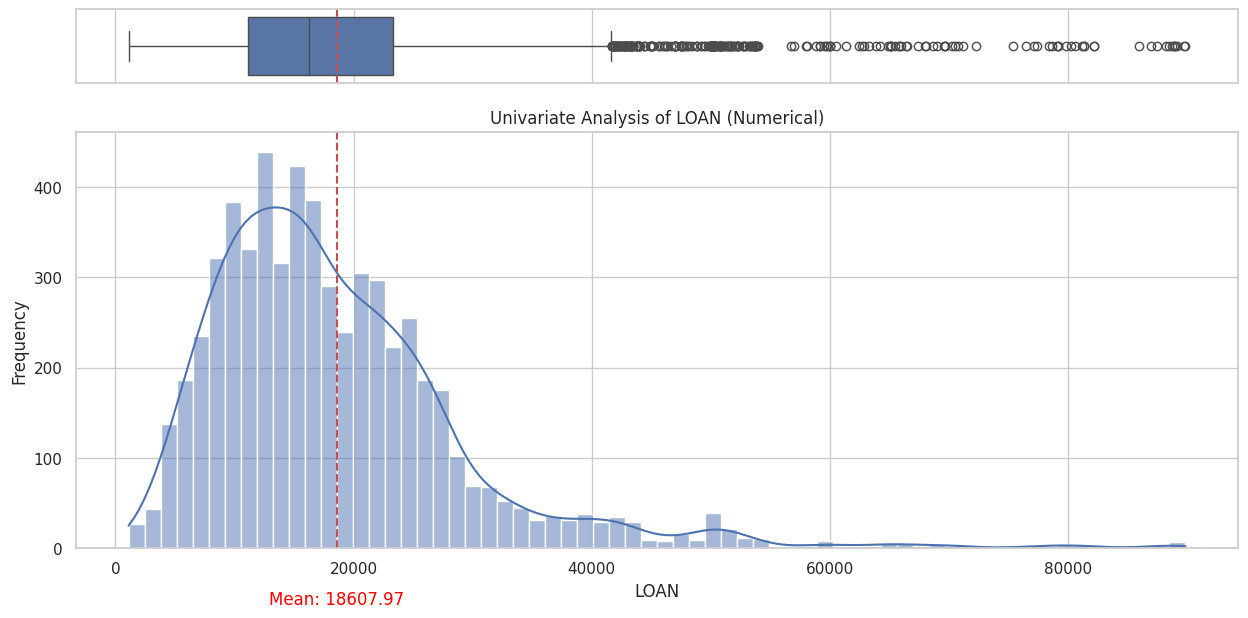

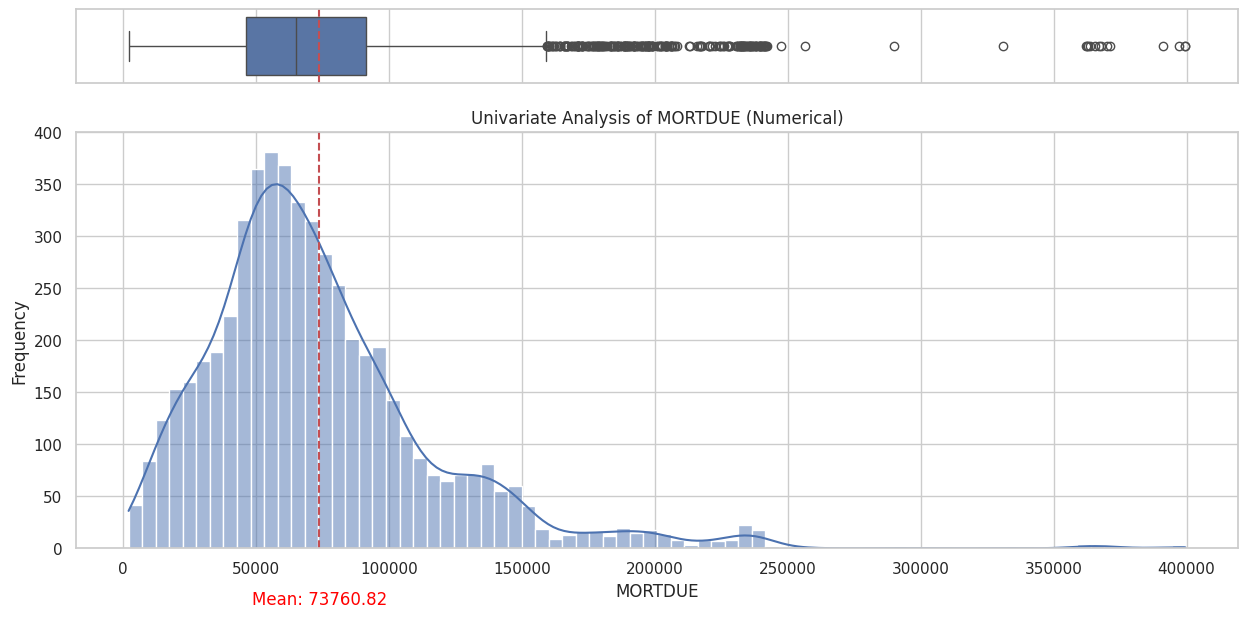

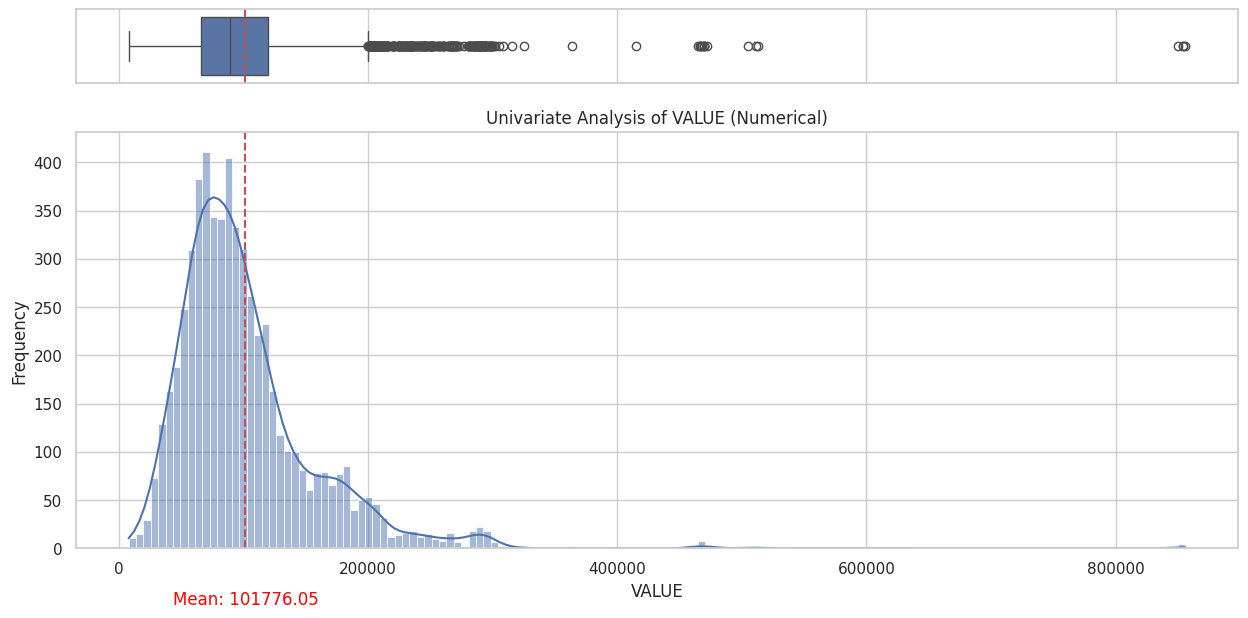

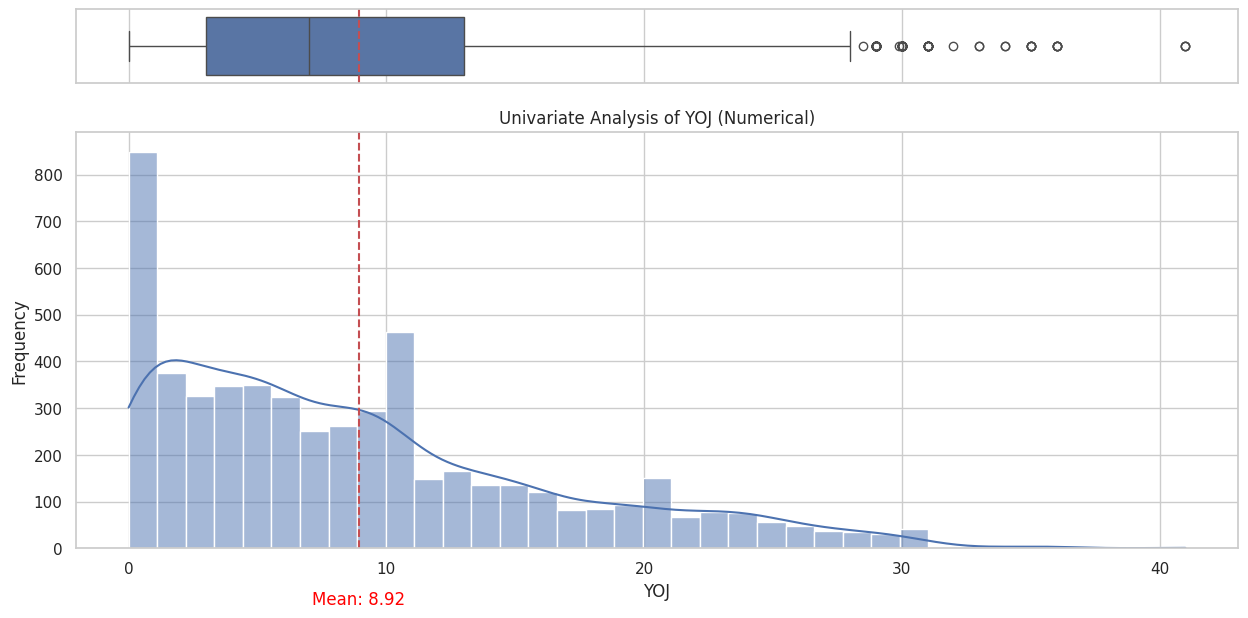

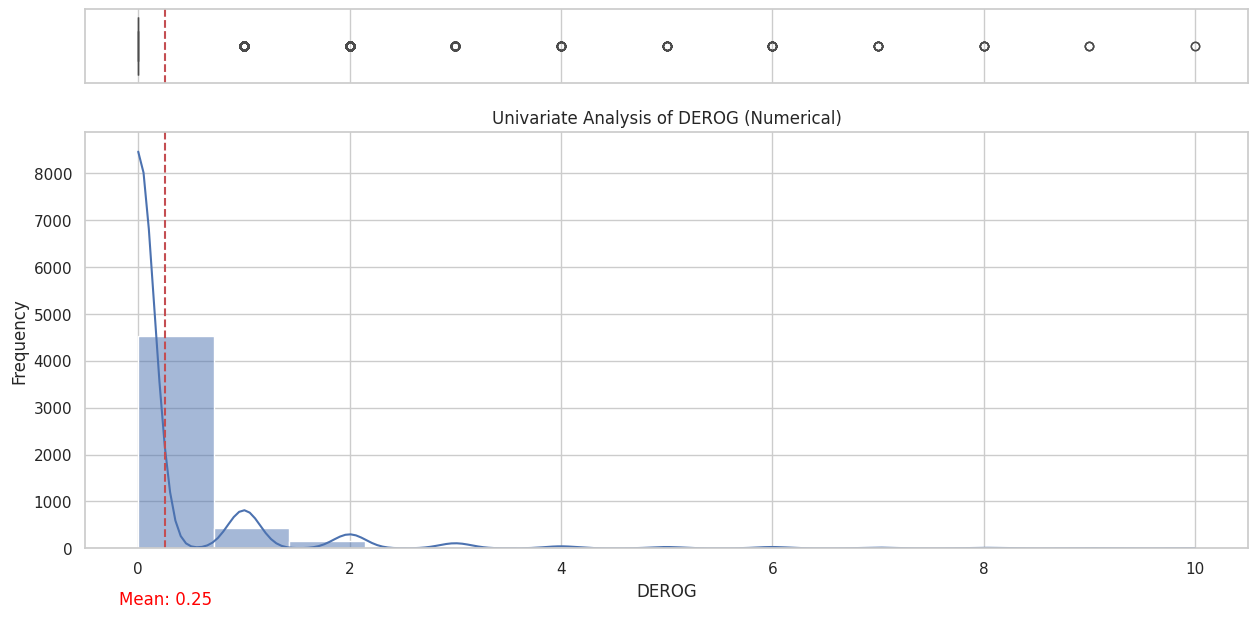

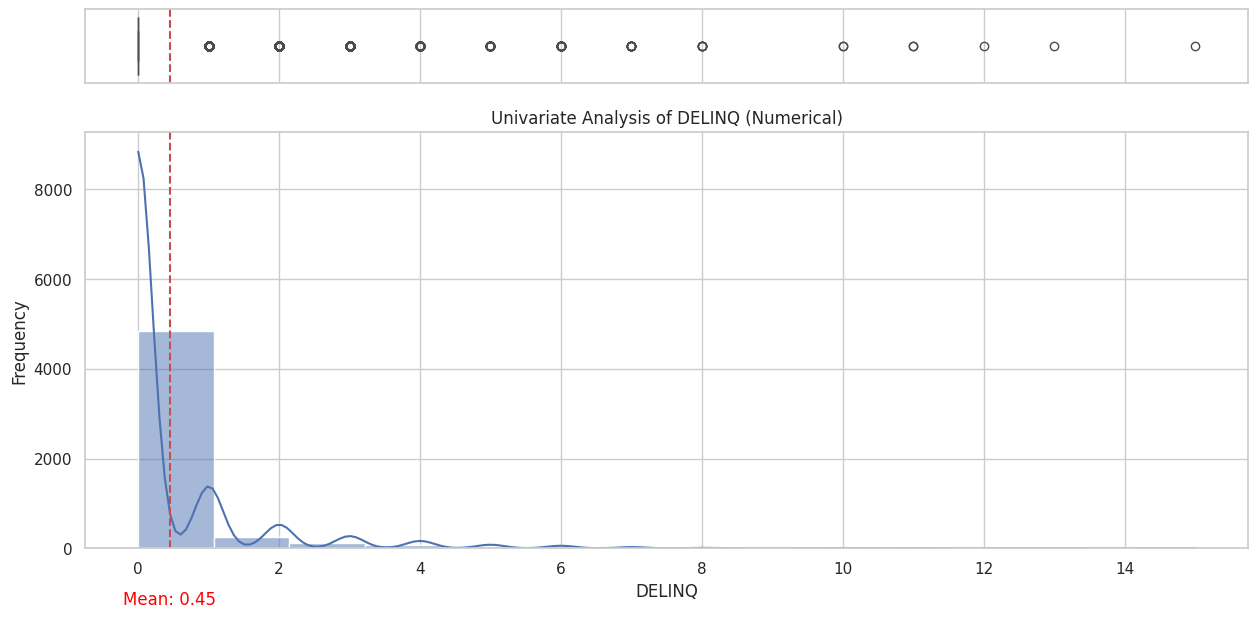

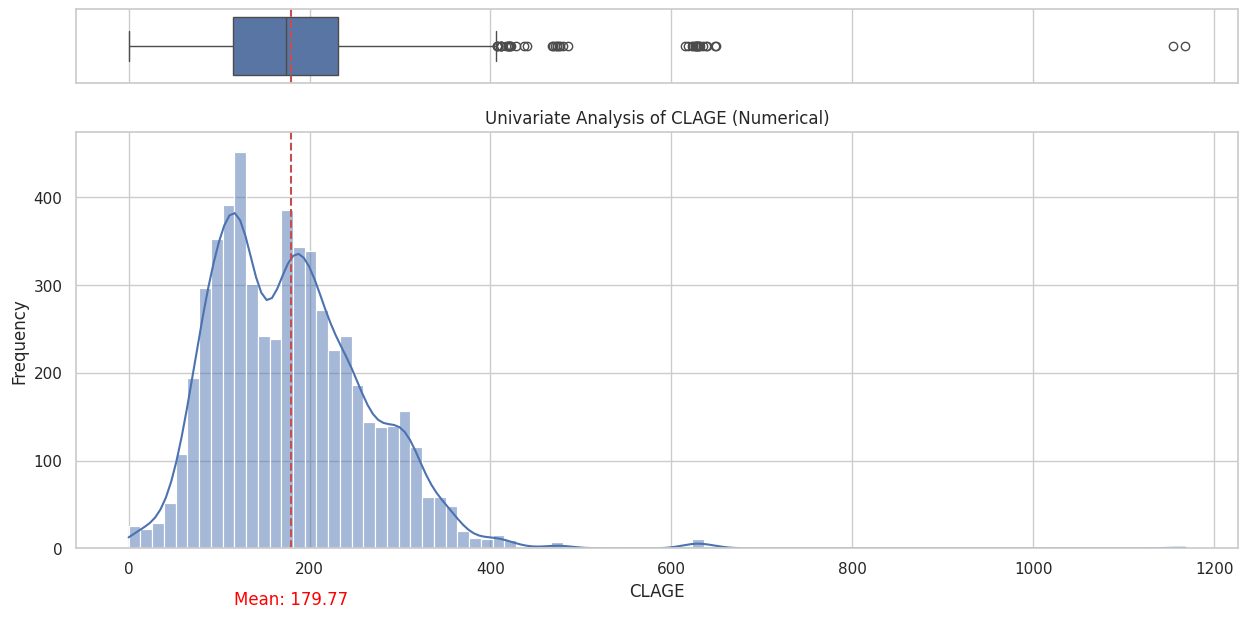

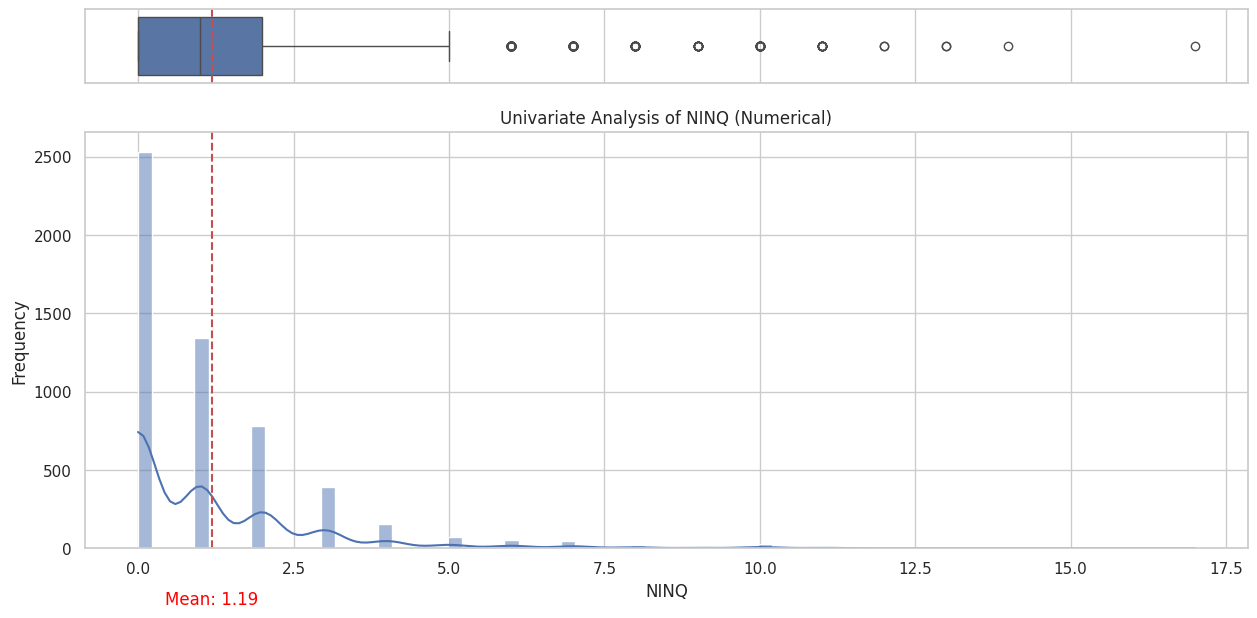

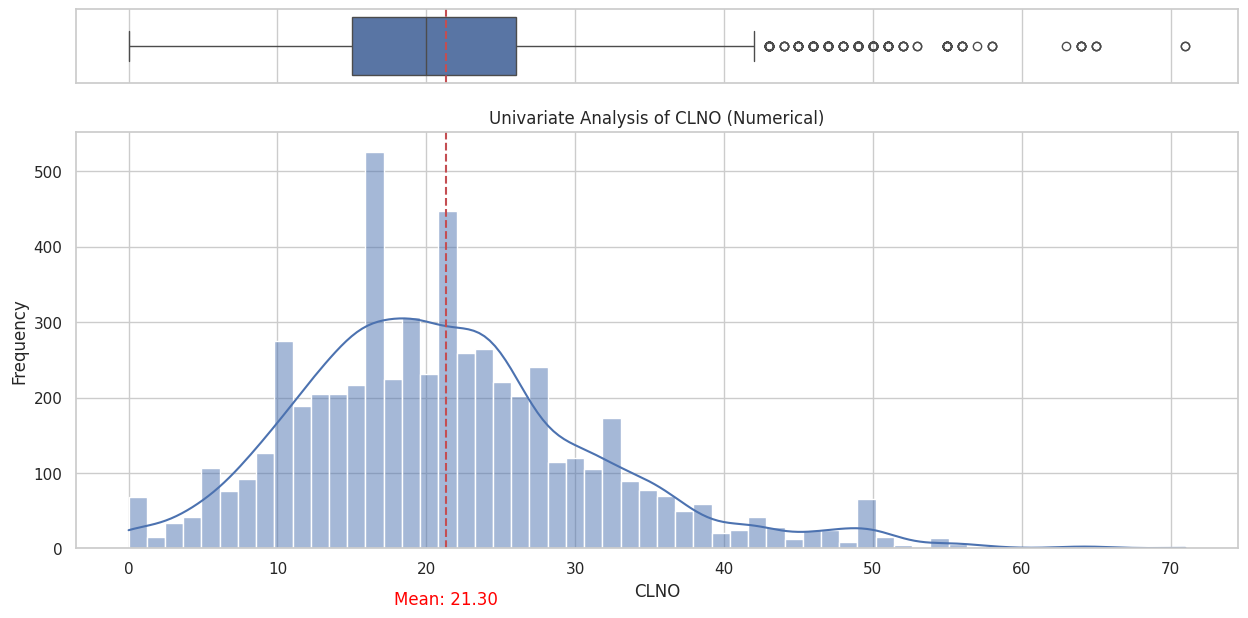

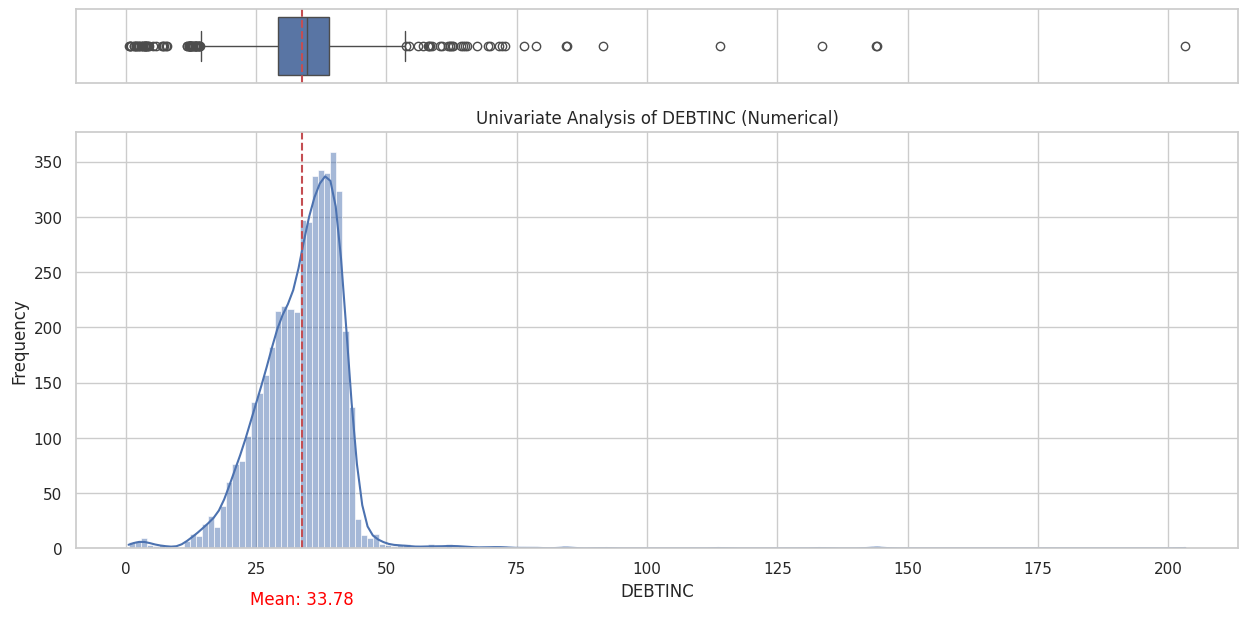

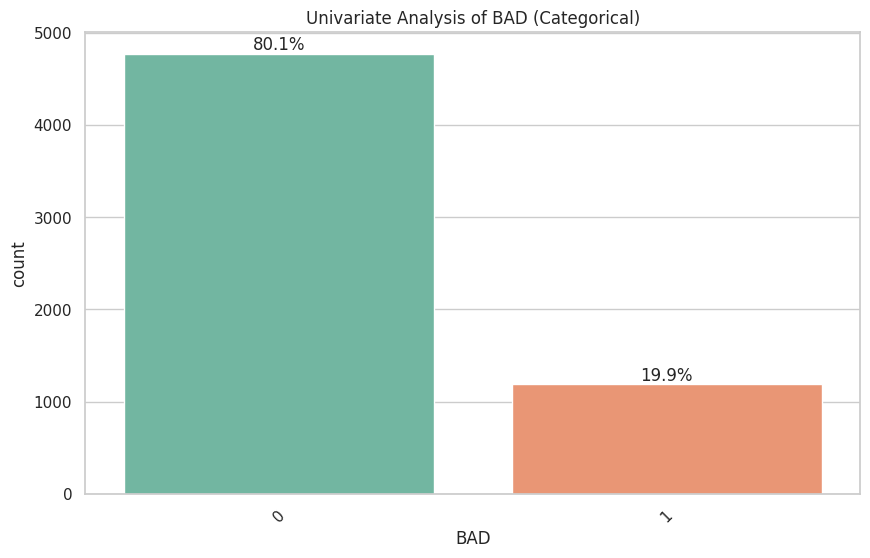

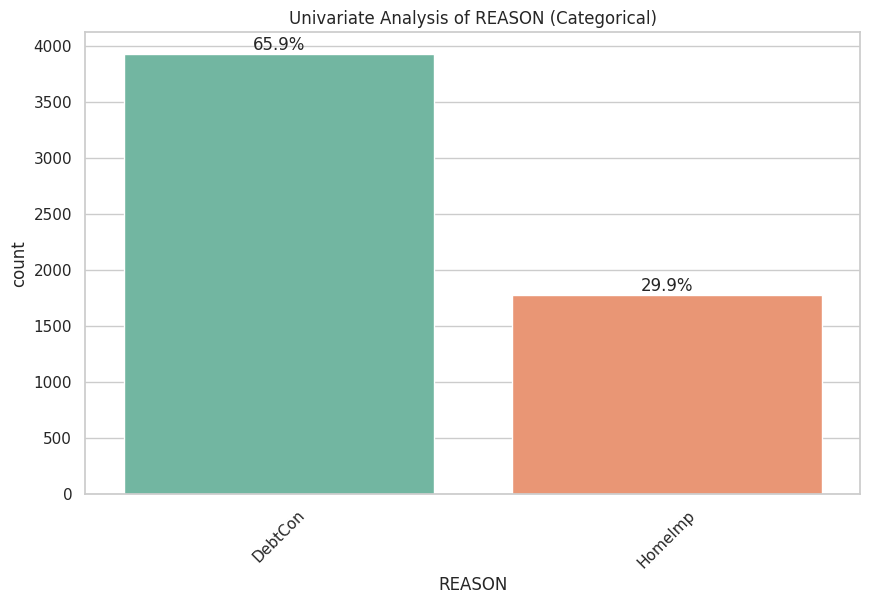

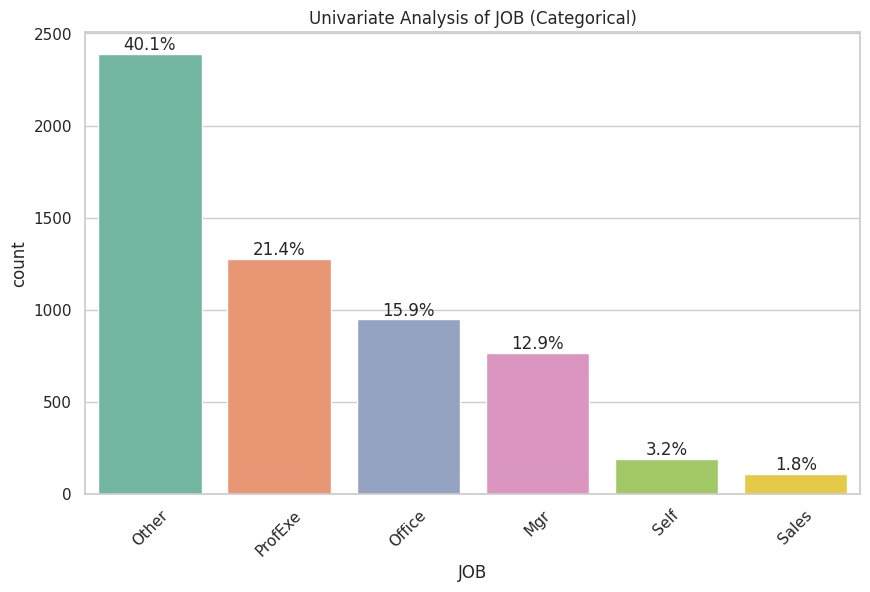

In [11]:
univariate_analysis(data)

### **Bivariate Analysis**


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


def bivariate_analysis(data, target="BAD"):
    sns.set(style="whitegrid")

    # Continuous Variables
    continuous_columns = data.select_dtypes(include=["int64", "float64", "float32"]).columns
    continuous_columns = continuous_columns.drop(target) if target in continuous_columns else continuous_columns

    for column in continuous_columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=target, y=column, data=data)
        plt.title(f"{column} vs. {target}")
        plt.show()

    # Categorical Variables
    categorical_columns = data.select_dtypes(include=["object", "category"]).columns
    if target not in categorical_columns:
        categorical_columns = categorical_columns.union([target])

    for column in categorical_columns:
        if column == target:
            continue
        plt.figure(figsize=(10, 6))
        ax = sns.countplot(x=column, hue=target, data=data)
        plt.title(f"{column} vs. {target}")
        plt.xticks(rotation=45)

        # Calculate percentages and add annotations
        total = len(data[column])
        for p in ax.patches:
            percentage = "{:.1f}%".format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha="center", va="bottom")

        plt.show()

    # Example for Continuous Variables Comparison with Regression Line
    plt.figure(figsize=(10, 6))
    sns.lmplot(x="LOAN", y="MORTDUE", hue=target, data=data, aspect=1.5)
    plt.title("LOAN vs. MORTDUE with Regression Line")
    plt.show()


# bivariate_analysis(data, 'BAD')

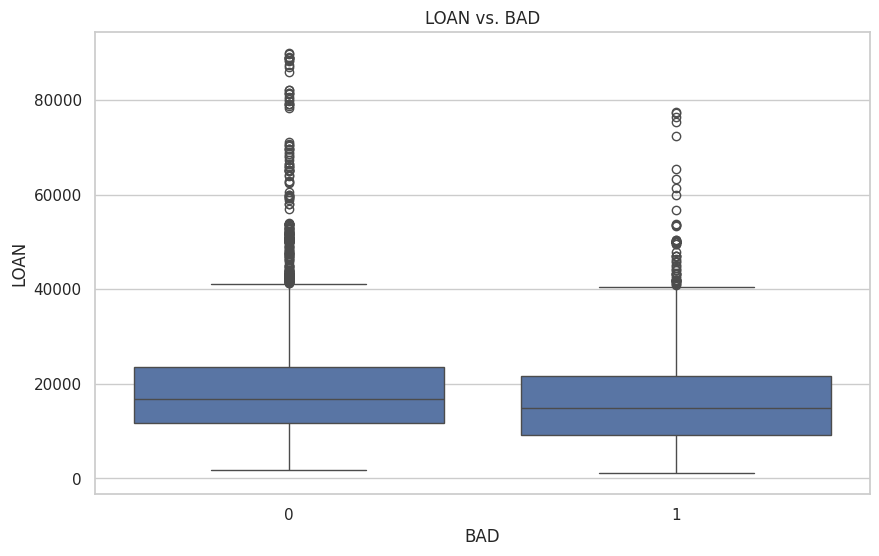

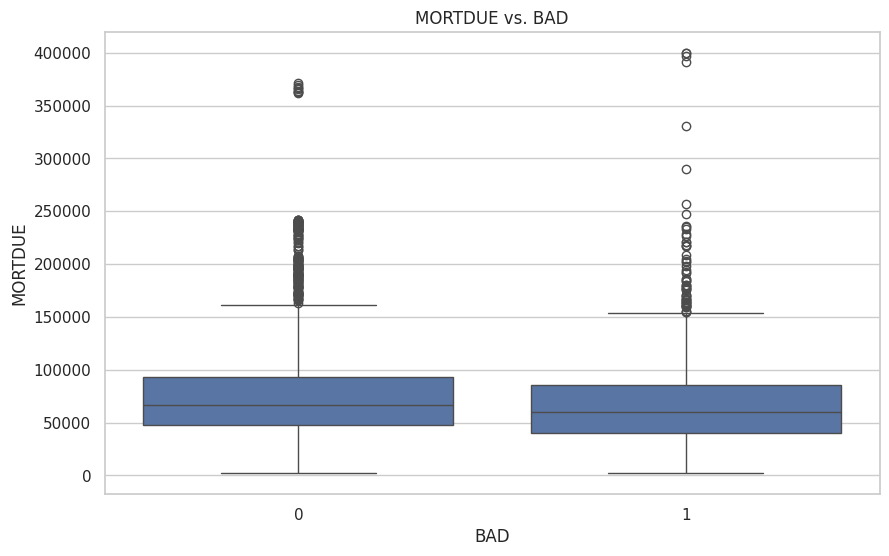

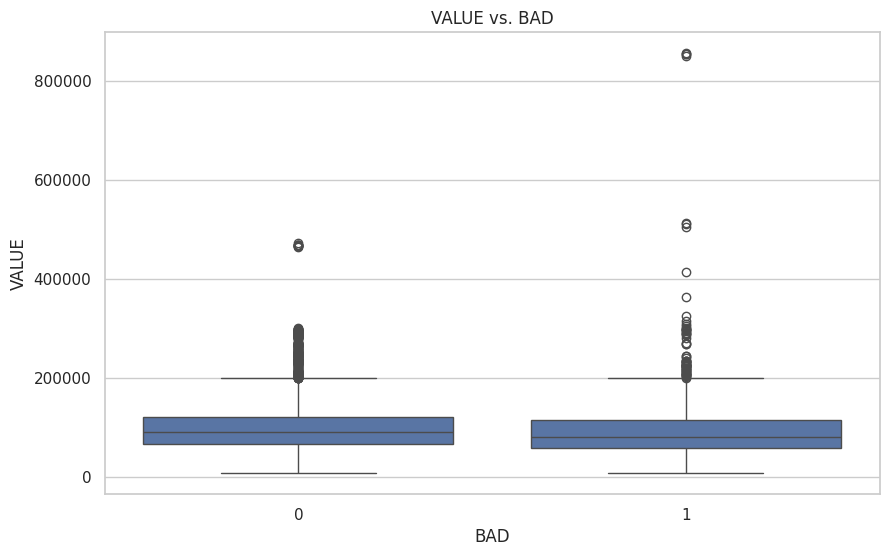

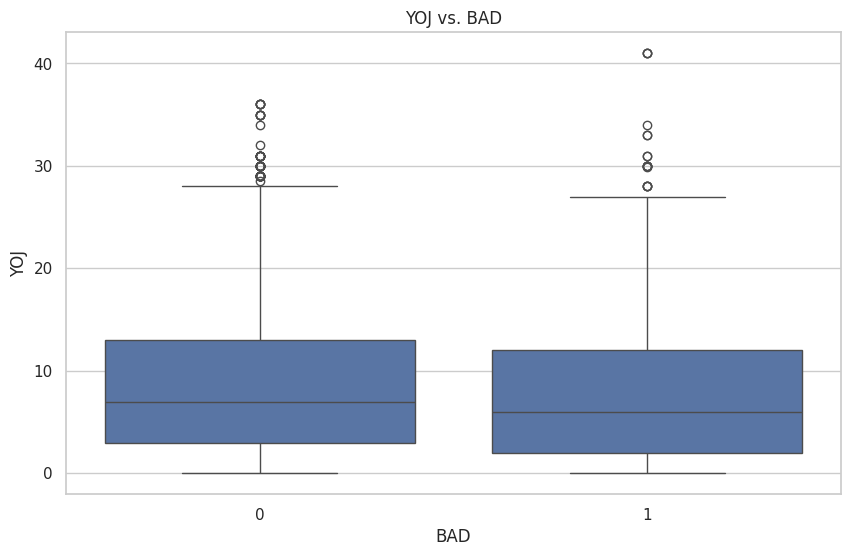

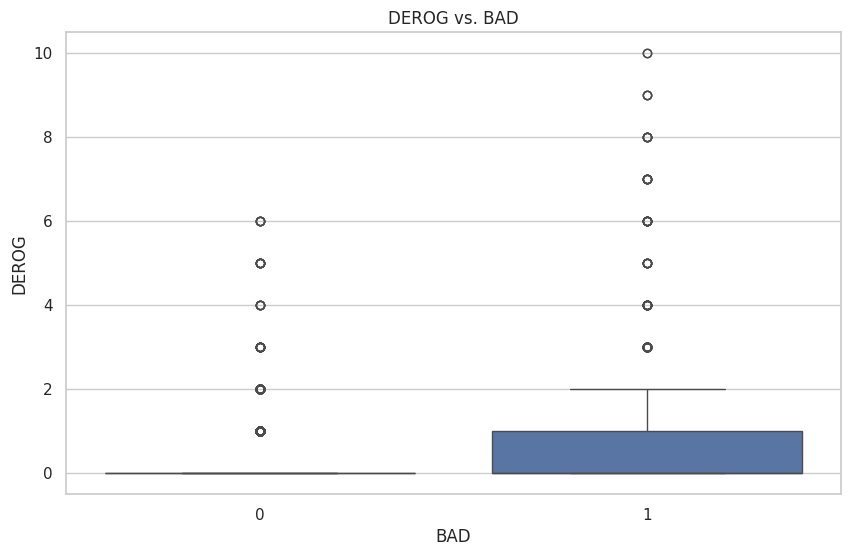

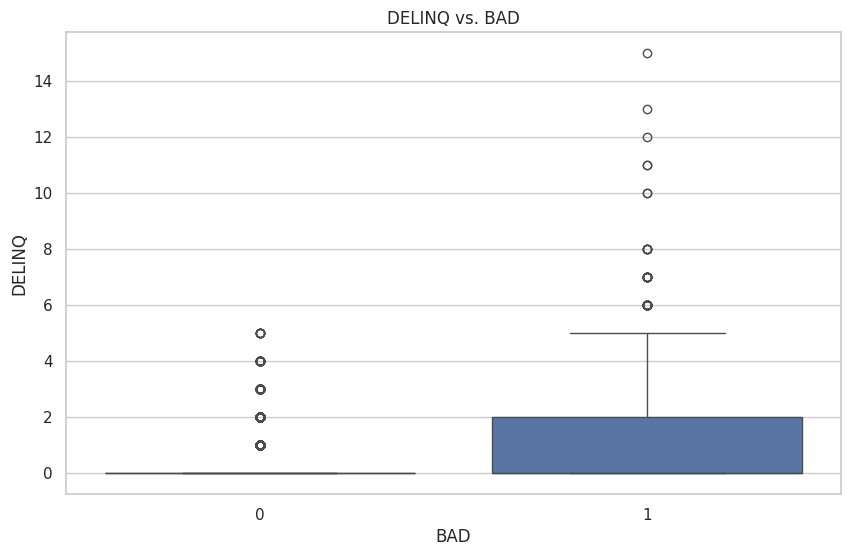

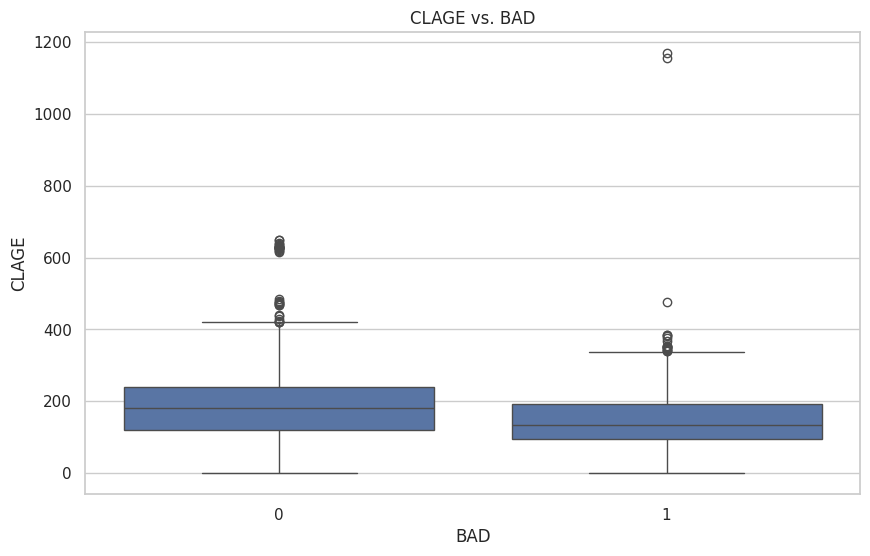

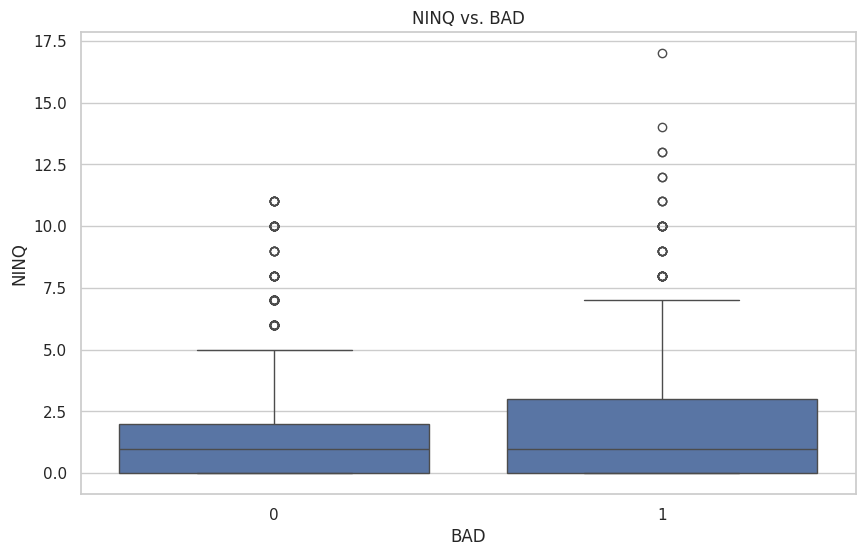

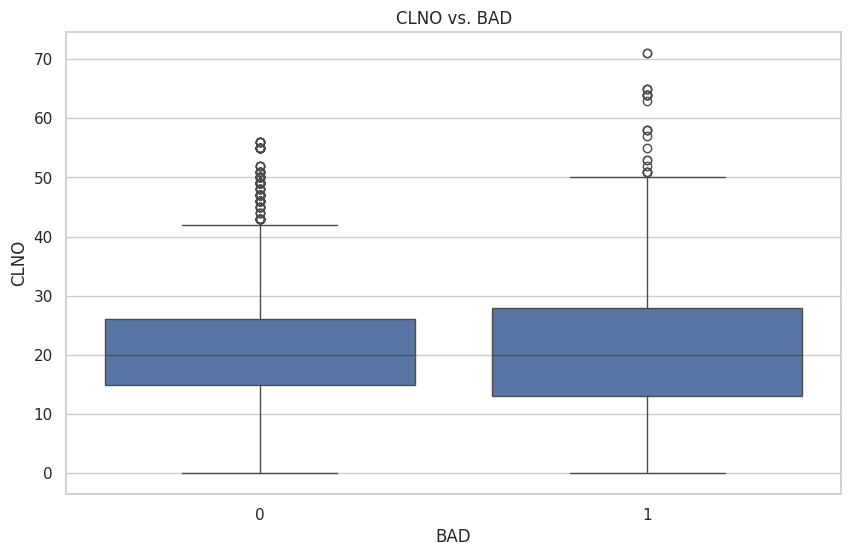

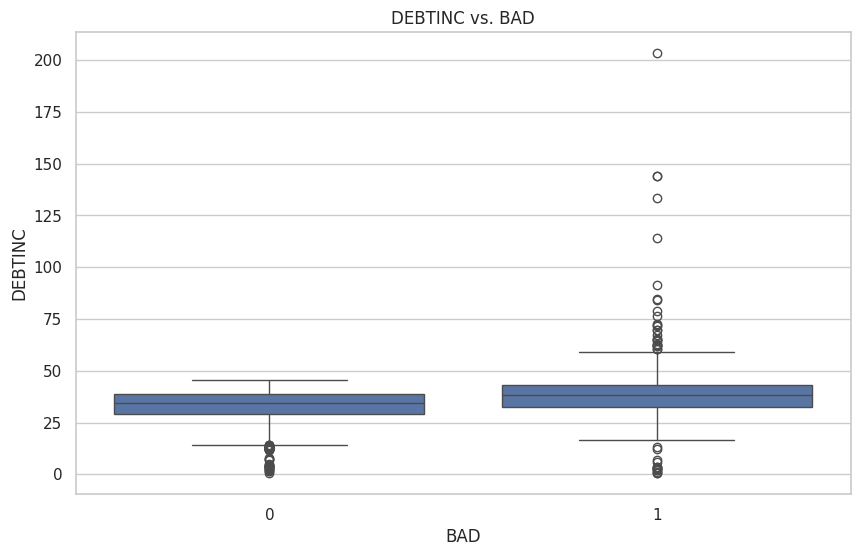

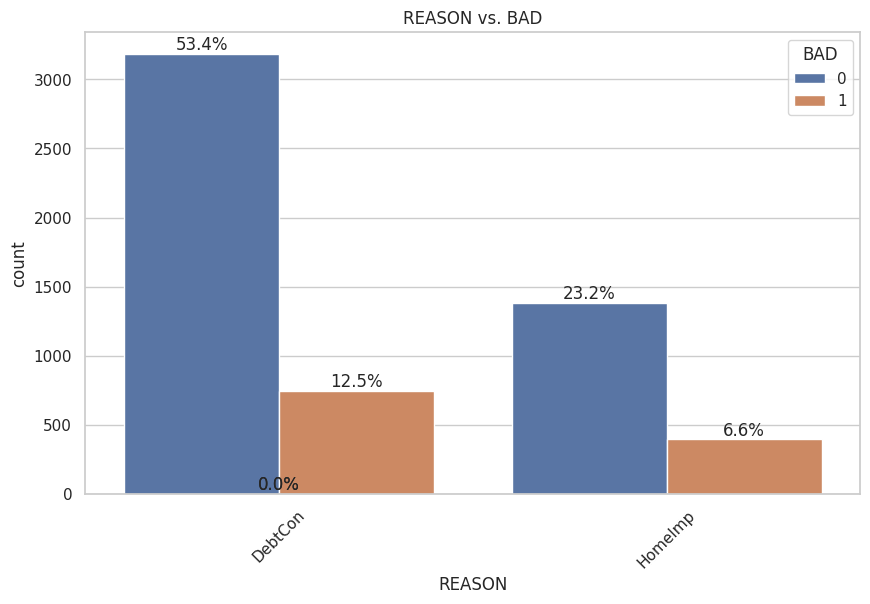

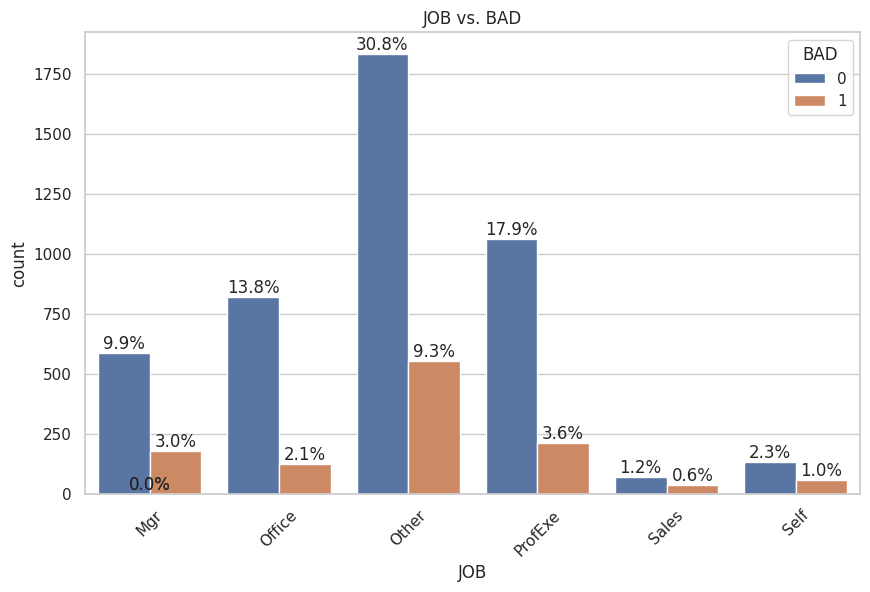

<Figure size 1000x600 with 0 Axes>

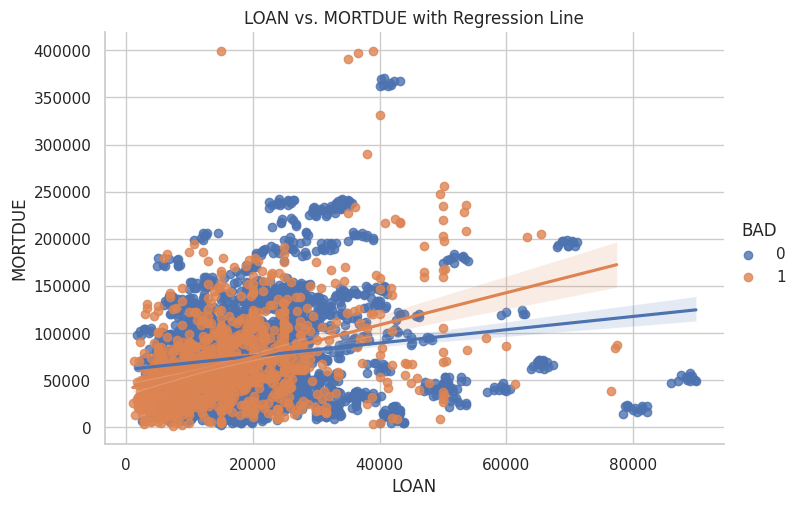

In [13]:
# Example usage
bivariate_analysis(data, "BAD")

In [14]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


### **Multivariate Analysis**


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt


def multivariate_analysis(data, target="BAD"):
    sns.set(style="white")

    # Correlation Heatmap for Numerical Variables
    numerical_data = data.select_dtypes(include=["int64", "float64", "float32"])
    plt.figure(figsize=(12, 10))
    correlation_matrix = numerical_data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Heatmap")
    plt.show()

    # Pairplot for the dataset with 'BAD' as hue
    # Note: For large datasets, consider using a sample to speed up the plotting
    # or select fewer columns if the pairplot is too crowded or slow to generate
    sampled_data = data.sample(frac=0.1, random_state=42)  # Sample 10% of the data for the pairplot if necessary
    sns.pairplot(sampled_data, hue=target, vars=numerical_data.columns)
    plt.title("Pairplot with BAD as hue")
    plt.show()

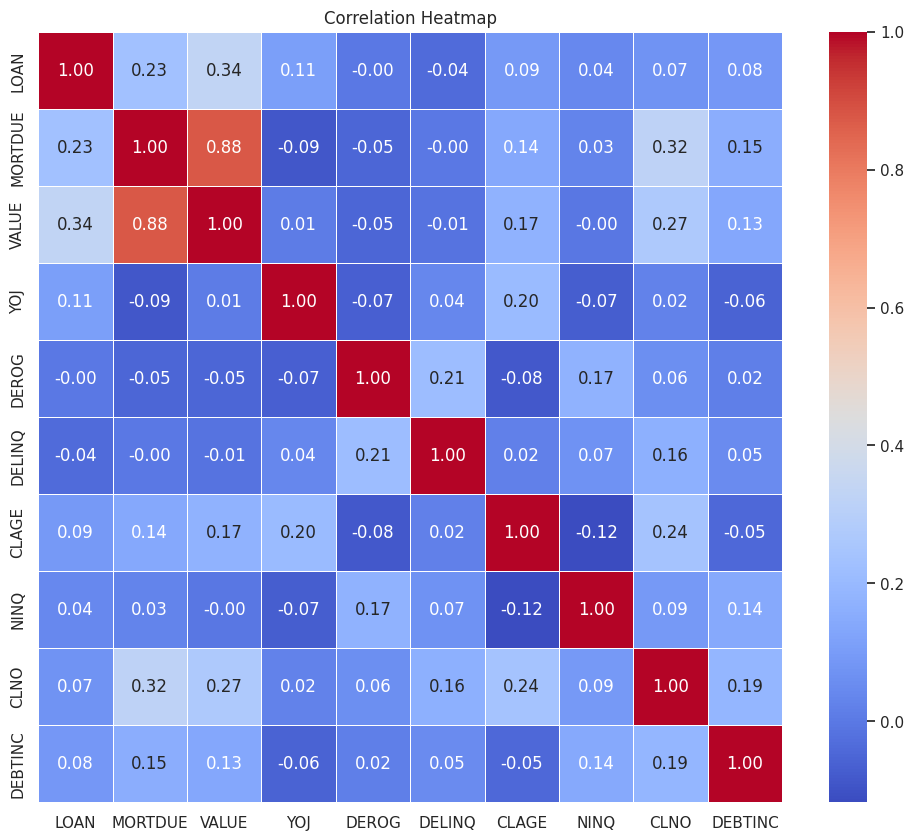

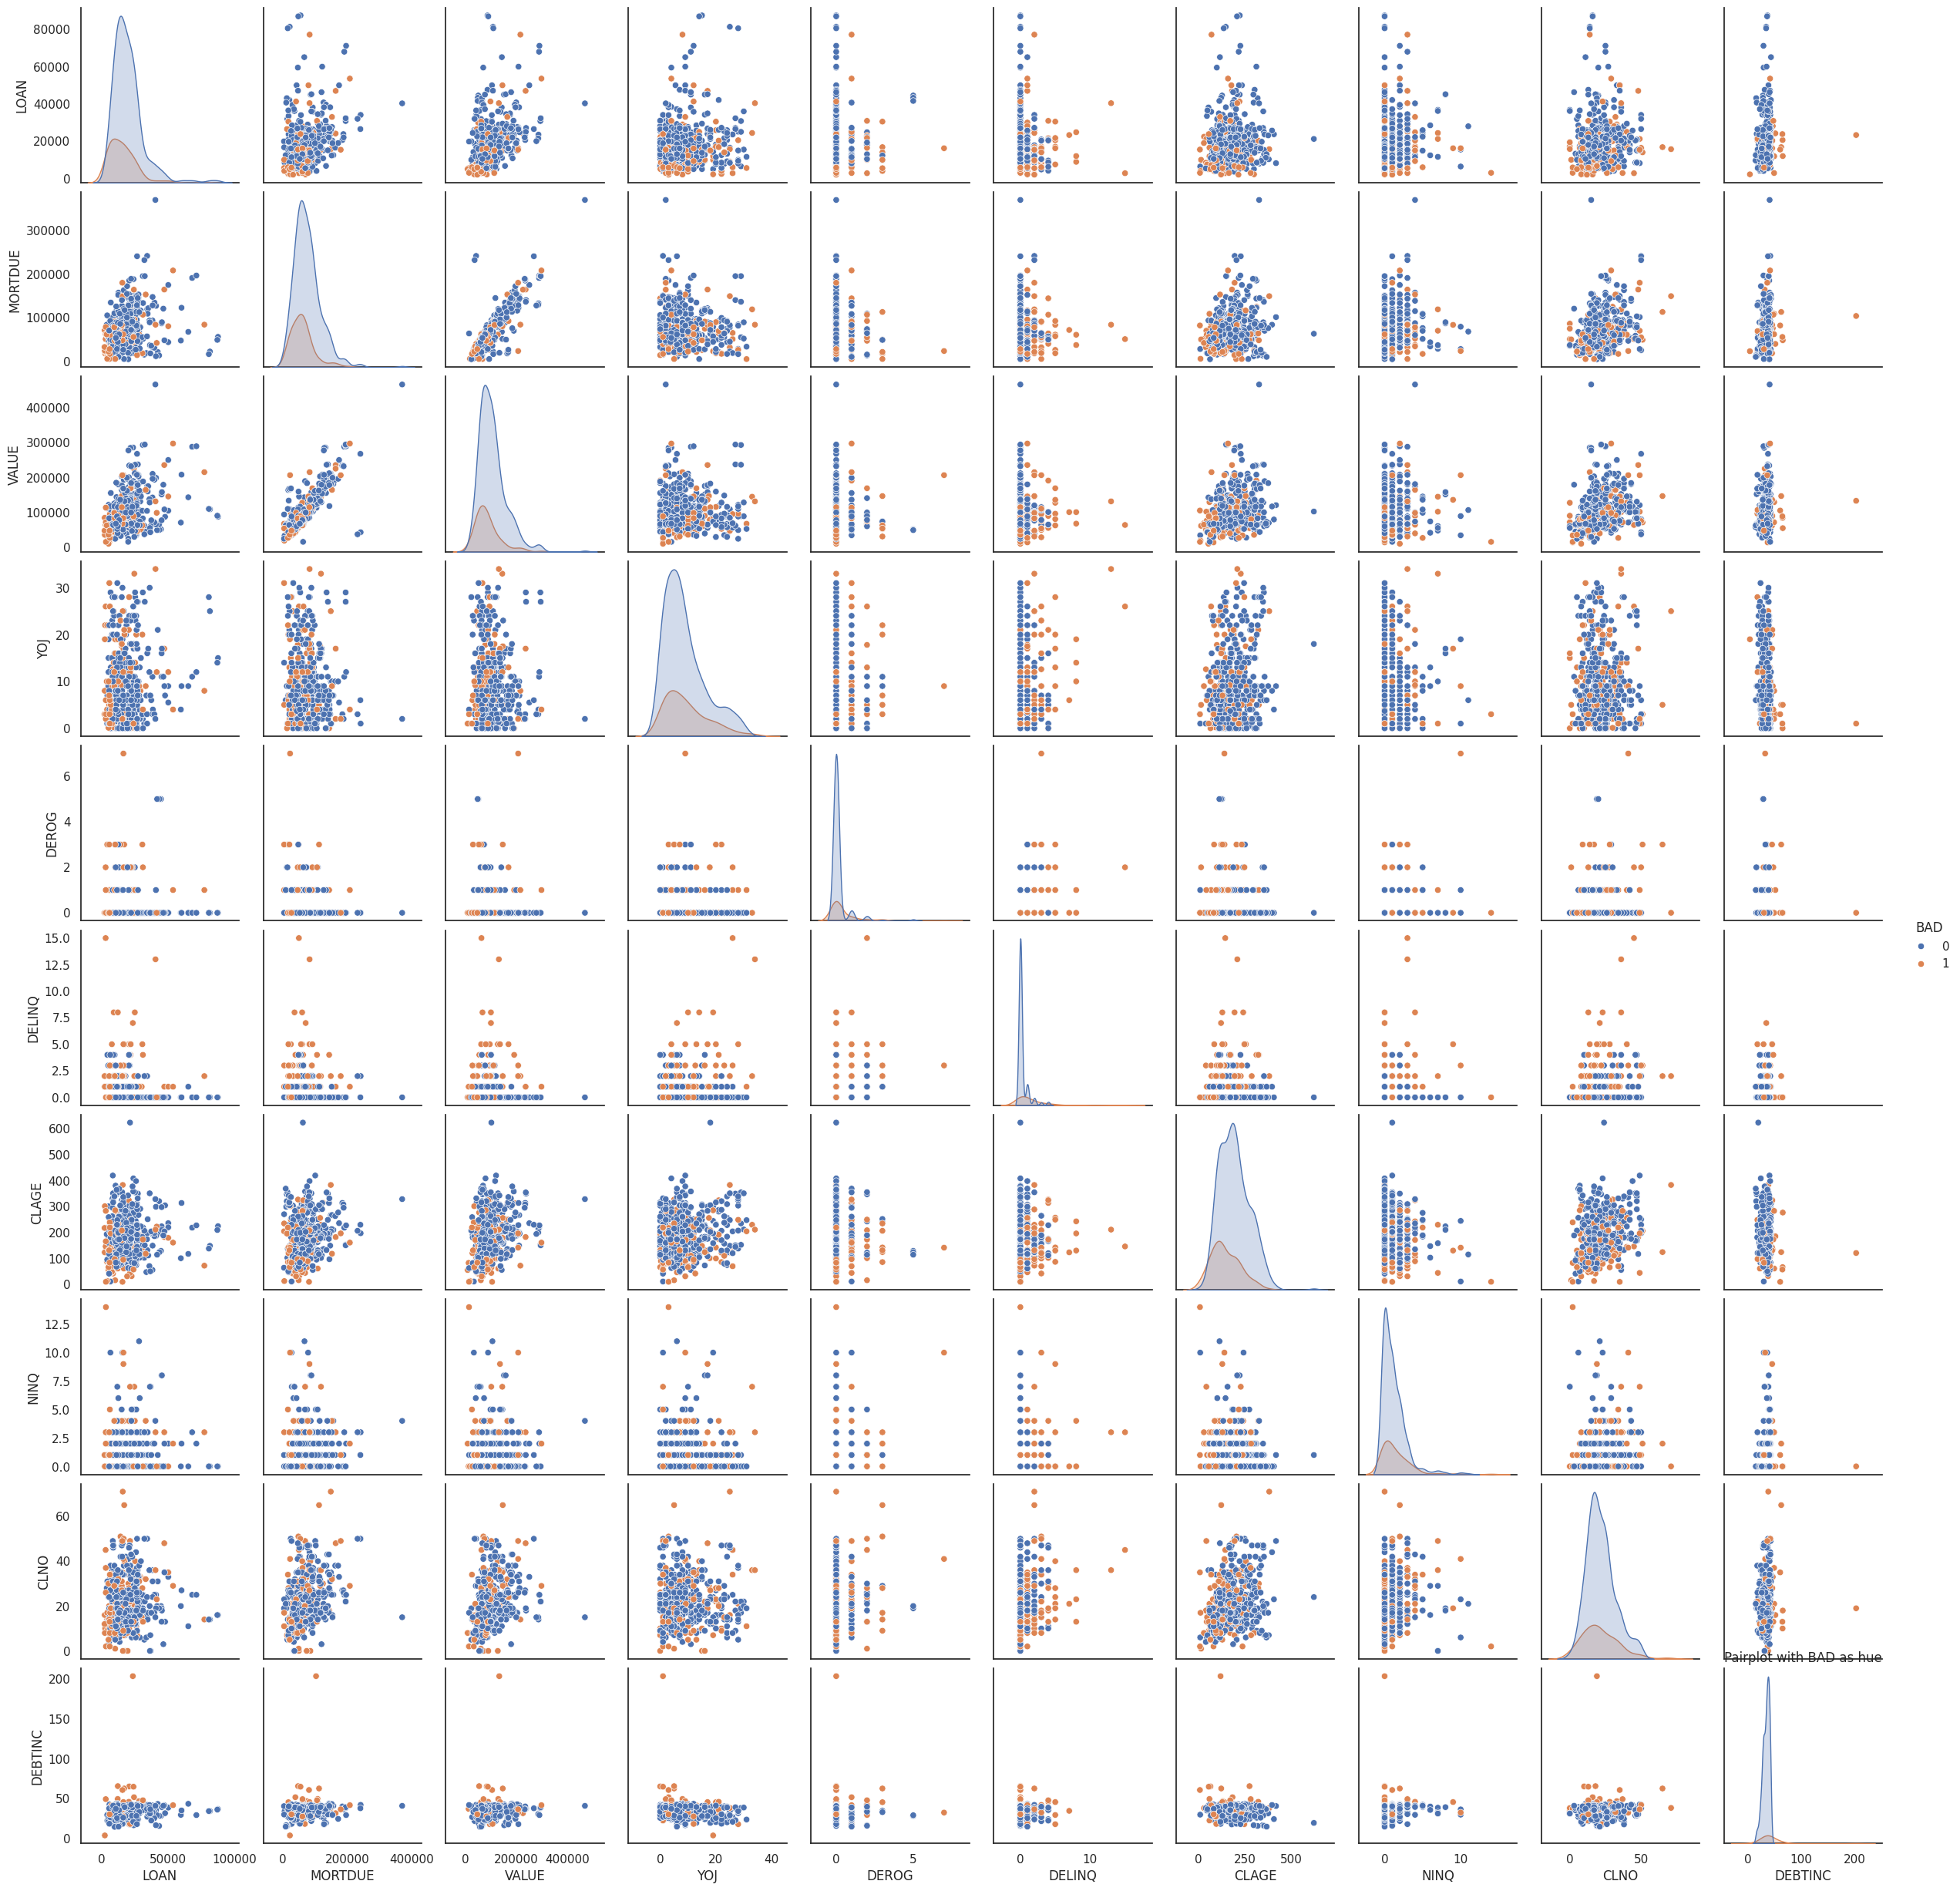

In [16]:
# Example usage
multivariate_analysis(data, "BAD")

## Treating Outliers


In [17]:
import numpy as np


def treat_outliers(data, method="cap"):
    """
    Treat outliers in the numerical columns of the dataset based on the IQR method.

    Parameters:
    - data: pandas DataFrame containing the data.
    - method: 'cap' to cap outliers with threshold values or 'remove' to drop rows with outliers.

    Returns:
    - The DataFrame with outliers treated.
    """
    treated_data = data.copy()
    for column in treated_data.select_dtypes(include=["float64", "float32", "int64"]).columns:
        Q1 = treated_data[column].quantile(0.25)
        Q3 = treated_data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        if method == "cap":
            treated_data[column] = np.where(treated_data[column] < lower_bound, lower_bound, treated_data[column])
            treated_data[column] = np.where(treated_data[column] > upper_bound, upper_bound, treated_data[column])
        elif method == "remove":
            treated_data = treated_data[(treated_data[column] >= lower_bound) & (treated_data[column] <= upper_bound)]

    return treated_data


# Example usage
# data_treated = treat_outliers(data, method='cap')
# or
# data_treated = treat_outliers(data, method='remove')

In [18]:
data = treat_outliers(data, method="cap")

## Treating Missing Values


In [19]:
# Understanding the shape of the dataset
print("Shape of the dataset:")
print(data.shape)
print("\n")

# Checking the data types
print("Data types of each column:")
print(data.dtypes)
print("\n")

# Checking for missing values
print("Missing values in each column:")
print(data.isnull().sum())
print("\n")

# Checking for duplicated values
print("Number of duplicated records:")
print(data.duplicated().sum())

Shape of the dataset:
(5960, 13)


Data types of each column:
BAD        category
LOAN        float64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object


Missing values in each column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


Number of duplicated records:
0


In [20]:
from sklearn.impute import SimpleImputer
import pandas as pd


def treat_missing_values(data):
    """
    Treats missing values in a DataFrame. Numerical missing values are filled with the median of their columns,
    and categorical missing values are filled with the most frequent value of their columns.

    Parameters:
    - data: A pandas DataFrame.

    Returns:
    - A DataFrame with missing values treated.
    """

    # Creating a copy of the data to avoid modifying the original dataset
    treated_data = data.copy()

    # Impute numerical columns with the median
    num_imputer = SimpleImputer(strategy="median")
    numerical_columns = treated_data.select_dtypes(include=["int64", "float64"]).columns
    treated_data[numerical_columns] = num_imputer.fit_transform(treated_data[numerical_columns])

    # Impute categorical columns with the most frequent value
    cat_imputer = SimpleImputer(strategy="most_frequent")
    categorical_columns = treated_data.select_dtypes(include=["object", "category"]).columns
    treated_data[categorical_columns] = cat_imputer.fit_transform(treated_data[categorical_columns])

    return treated_data


# Example usage:
# treated_data = treat_missing_values(data)
# print(treated_data.isnull().sum())  # This should now show zero missing values for all columns

In [21]:
treated_data = treat_missing_values(data)
print(treated_data.isnull().sum())  # This should now show zero missing values for all columns

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


In [22]:
# Understanding the shape of the dataset
print("Shape of the dataset:")
print(treated_data.shape)
print("\n")

# Checking the data types
print("Data types of each column:")
print(treated_data.dtypes)
print("\n")

# Checking for missing values
print("Missing values in each column:")
print(treated_data.isnull().sum())
print("\n")

# Checking for duplicated values
print("Number of duplicated records:")
print(treated_data.duplicated().sum())

Shape of the dataset:
(5960, 13)


Data types of each column:
BAD         object
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


Missing values in each column:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


Number of duplicated records:
0


In [23]:
data_final = treated_data

In [24]:
# Understanding the shape of the dataset
print("Shape of the dataset:")
print(data_final.shape)
print("\n")

# Checking the data types
print("Data types of each column:")
print(data_final.dtypes)
print("\n")

# Checking for missing values
print("Missing values in each column:")
print(data_final.isnull().sum())
print("\n")

# Checking for duplicated values
print("Number of duplicated records:")
print(data_final.duplicated().sum())

Shape of the dataset:
(5960, 13)


Data types of each column:
BAD         object
LOAN       float64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


Missing values in each column:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


Number of duplicated records:
0


In [25]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


def prepare_data(data_final, target="BAD"):
    # Convert object types to categorical, except for the target variable
    for col in data_final.columns:
        if data_final[col].dtype == "object" and col != target:
            data_final[col] = data_final[col].astype("category")

    # Create the dependent variable 'y'
    y = data_final[target]

    # Drop the dependent variable from the dataframe to create 'X'
    X = data_final.drop(target, axis=1)

    # Select categorical columns for one-hot encoding, excluding the target variable
    categorical_cols = X.select_dtypes(include=["category"]).columns

    # Select numerical columns for scaling
    numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns

    # Define transformers for the ColumnTransformer
    one_hot_encoder = OneHotEncoder(drop="first")
    scaler = StandardScaler()

    # Create ColumnTransformer to apply transformations
    preprocessor = ColumnTransformer(
        transformers=[("cat", one_hot_encoder, categorical_cols), ("num", scaler, numerical_cols)],
        remainder="passthrough",  # Ensures other variables are unaffected
    )

    # Apply transformations
    X_transformed = preprocessor.fit_transform(X)

    # Get feature names for transformed columns
    new_feature_names = preprocessor.get_feature_names_out()

    # Create a DataFrame from the transformed data
    X_transformed_df = pd.DataFrame(X_transformed, columns=new_feature_names)

    return X_transformed_df, y

In [26]:
# Example usage:
X, y = prepare_data(data_final, "BAD")
print(X.head())
print(y.head())

   cat__REASON_HomeImp  cat__JOB_Office  cat__JOB_Other  cat__JOB_ProfExe  \
0                  1.0              0.0             1.0               0.0   
1                  1.0              0.0             1.0               0.0   
2                  1.0              0.0             1.0               0.0   
3                  0.0              0.0             1.0               0.0   
4                  1.0              1.0             0.0               0.0   

   cat__JOB_Sales  cat__JOB_Self  num__LOAN  num__MORTDUE  num__VALUE  \
0             0.0            0.0  -1.832283     -1.268083   -1.328686   
1             0.0            0.0  -1.810666     -0.026523   -0.670929   
2             0.0            0.0  -1.789048     -1.615326   -1.828581   
3             0.0            0.0  -1.789048     -0.167948   -0.204386   
4             0.0            0.0  -1.767431      0.753003    0.305350   

   num__YOJ  num__DEROG  num__DELINQ  num__CLAGE  num__NINQ  num__CLNO  \
0  0.251171         0.0 

In [27]:
X.head()

,cat__REASON_HomeImp,cat__JOB_Office,cat__JOB_Other,cat__JOB_ProfExe,cat__JOB_Sales,cat__JOB_Self,num__LOAN,num__MORTDUE,num__VALUE,num__YOJ,num__DEROG,num__DELINQ,num__CLAGE,num__NINQ,num__CLNO,num__DEBTINC
0,1.0,0.0,1.0,0.0,0.0,0.0,-1.832283,-1.268083,-1.328686,0.251171,0.0,0.0,-1.071599,-0.065054,-1.297476,0.140949
1,1.0,0.0,1.0,0.0,0.0,0.0,-1.810666,-0.026523,-0.670929,-0.240303,0.0,0.0,-0.721212,-0.826792,-0.756608,0.140949
2,1.0,0.0,1.0,0.0,0.0,0.0,-1.789048,-1.615326,-1.828581,-0.661566,0.0,0.0,-0.368698,-0.065054,-1.189302,0.140949
3,0.0,0.0,1.0,0.0,0.0,0.0,-1.789048,-0.167948,-0.204386,-0.240303,0.0,0.0,-0.062534,-0.065054,-0.107566,0.140949
4,1.0,1.0,0.0,0.0,0.0,0.0,-1.767431,0.753003,0.305350,-0.801987,0.0,0.0,-1.084781,-0.826792,-0.756608,0.140949


In [28]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: object

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?


## **Model Building - Approach**

- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set


In [29]:
from sklearn.model_selection import train_test_split

# Split the data into training and test set
# Typically, 70% of the data is used for training and 30% for testing, but this ratio can be adjusted.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Example print to verify the split
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (4172, 16)
X_test shape: (1788, 16)
y_train shape: (4172,)
y_test shape: (1788,)


In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

2024-03-31 18:03:12.622669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-31 18:03:13.171217: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [31]:
def build_nn(input_shape):
    """Builds a simple neural network model."""
    model = Sequential(
        [
            Dense(128, activation="relu", input_shape=(input_shape,)),
            Dense(64, activation="relu"),
            Dense(32, activation="relu"),
            Dense(1, activation="sigmoid"),  # Binary classification output
        ]
    )
    model.compile(optimizer=Adam(), loss="binary_crossentropy", metrics=["accuracy"])
    return model


def metrics_bar_plot(results_df):
    """Creates a bar plot for the metrics of each model."""

    # Convert 'results_df' to long format for seaborn bar plot
    results_melted = results_df.drop(columns=["y_pred"])  # Drop y_pred column for plotting
    results_melted = results_melted.melt(id_vars="Model", var_name="Metric", value_name="Score")

    plt.figure(figsize=(14, 8))
    sns.barplot(data=results_melted, x="Metric", y="Score", hue="Model")
    plt.title("Model Metrics Comparison")
    plt.legend(title="Model", loc="center left", bbox_to_anchor=(1, 0.5))  # Move legend to the side

    # Add annotations to the bars
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(
            format(p.get_height(), ".2f"),
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
        )

    plt.show()


def plot_confusion_matrix(y_true, y_pred, title):
    """Plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

In [32]:
def evaluate_and_plot_models(X, y):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        "SVM": SVC(probability=True),
        "Gradient Boosting": GradientBoostingClassifier(),
        # Add or replace with other models as required
    }

    # Initialize DataFrame to store results
    results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "ROC AUC"])

    # Initialize an empty list to store the predictions of each model
    predictions = {}

    plt.figure(figsize=(10, 8))  # ROC Curve Comparison plot

    for name, model in models.items():
        print(f"Evaluating {name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = (
            model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)
        )

        # Calculate metrics and update results_df
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_proba)

        # Create a temporary DataFrame and concatenate
        temp_df = pd.DataFrame(
            {
                "Model": [name],
                "Accuracy": [accuracy],
                "Precision": [precision],
                "Recall": [recall],
                "F1 Score": [f1],
                "ROC AUC": [roc_auc],
                "y_pred": [list(y_pred)],  # Store as a list for now
            }
        )
        results_df = pd.concat([results_df, temp_df], ignore_index=True)

        # ROC Curve plotting here
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

        # Store the model predictions in the dictionary
        predictions[name] = y_pred.tolist()  # Convert to list for consistency

    # Evaluate and plot Neural Network
    print("Evaluating Neural Network...")
    nn = build_nn(X_train.shape[1])  # Make sure build_nn function is defined
    nn.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)
    y_pred_nn = nn.predict(X_test).ravel()
    y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)
    predictions["Neural Network"] = y_pred_nn_binary.tolist()

    # Calculate metrics and update results_df for Neural Network
    nn_accuracy = accuracy_score(y_test, y_pred_nn_binary)
    nn_precision = precision_score(y_test, y_pred_nn_binary)
    nn_recall = recall_score(y_test, y_pred_nn_binary)
    nn_f1 = f1_score(y_test, y_pred_nn_binary)
    nn_fpr, nn_tpr, _ = roc_curve(y_test, y_pred_nn)
    nn_roc_auc = auc(nn_fpr, nn_tpr)

    # Add NN metrics to results_df
    temp_nn_df = pd.DataFrame(
        {
            "Model": "Neural Network",
            "Accuracy": nn_accuracy,
            "Precision": nn_precision,
            "Recall": nn_recall,
            "F1 Score": nn_f1,
            "ROC AUC": nn_roc_auc,
            "y_pred": y_pred_nn_binary.tolist(),  # Store binary predictions as a list
        }
    )
    results_df = pd.concat([results_df, temp_nn_df], ignore_index=True)

    # Plot the ROC curve for the Neural Network
    plt.plot(nn_fpr, nn_tpr, label=f"Neural Network (AUC = {nn_roc_auc:.2f})")

    # Sort results_df by 'ROC AUC' in descending order
    results_df.sort_values("ROC AUC", ascending=False, inplace=True)

    # Plot formatting for ROC Curves
    plt.plot([0, 1], [0, 1], "k--", label="Chance (AUC = 0.50)")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.show()  # Ensure this is outside the loop

    # Now print classification reports and plot confusion matrices
    for name, y_pred_list in predictions.items():
        # Convert the predictions list back to a numpy array
        y_pred = np.array(y_pred_list)
        print(f"Classification Report for {name}:")
        print(classification_report(y_test, y_pred))
        plot_confusion_matrix(y_test, y_pred, title=f"{name} Confusion Matrix")

    # Plot metrics bar plot
    metrics_bar_plot(results_df)

    # Print the summary results table with all models including Neural Network
    print(results_df)

    return results_df

Evaluating Logistic Regression...
Evaluating Decision Tree...
Evaluating Random Forest...
Evaluating SVM...
Evaluating Gradient Boosting...
Evaluating Neural Network...


2024-03-31 18:03:15.792614: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-31 18:03:15.808772: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step


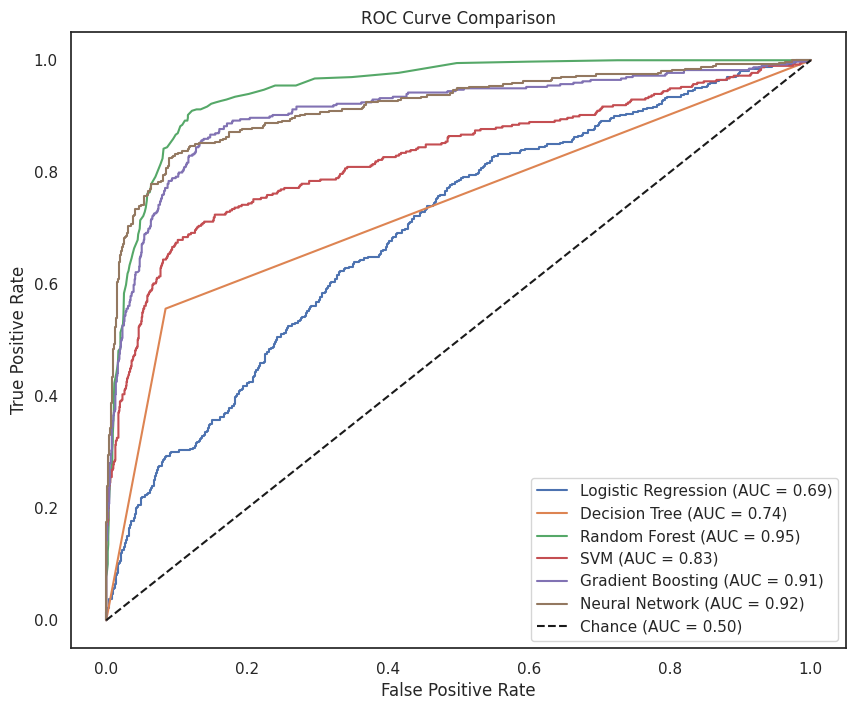

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.79      0.99      0.88      1389
           1       0.60      0.08      0.13       399

    accuracy                           0.78      1788
   macro avg       0.69      0.53      0.50      1788
weighted avg       0.75      0.78      0.71      1788



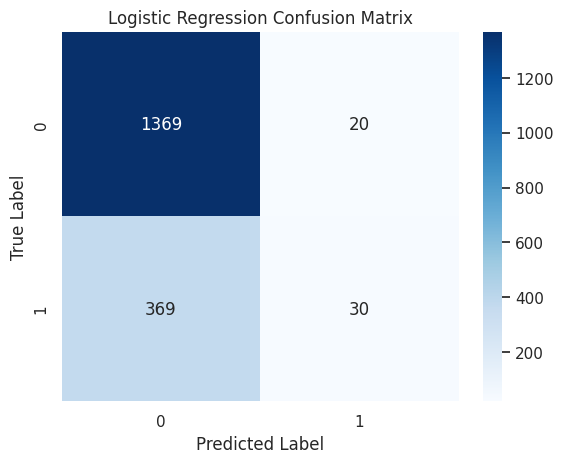

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1389
           1       0.65      0.56      0.60       399

    accuracy                           0.84      1788
   macro avg       0.77      0.74      0.75      1788
weighted avg       0.83      0.84      0.83      1788



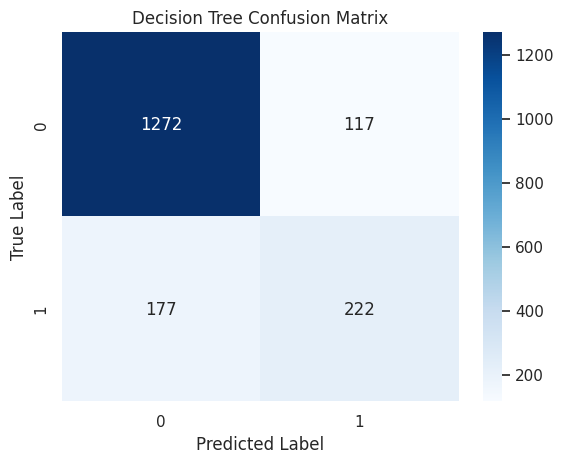

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1389
           1       0.85      0.62      0.72       399

    accuracy                           0.89      1788
   macro avg       0.87      0.80      0.83      1788
weighted avg       0.89      0.89      0.89      1788



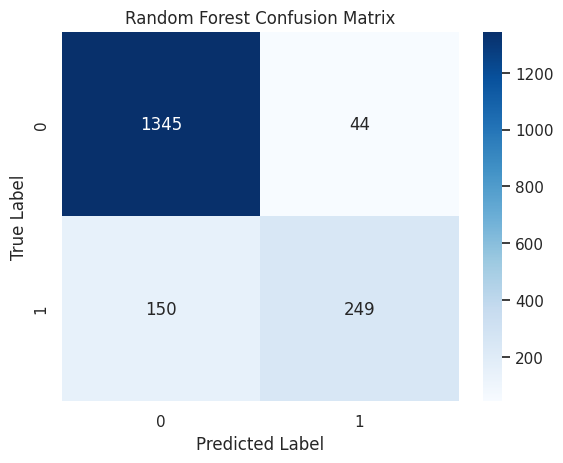

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.82      0.99      0.90      1389
           1       0.90      0.26      0.40       399

    accuracy                           0.83      1788
   macro avg       0.86      0.62      0.65      1788
weighted avg       0.84      0.83      0.79      1788



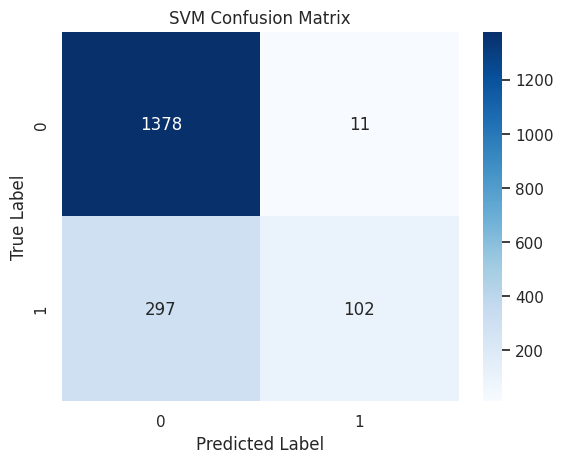

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1389
           1       0.81      0.62      0.70       399

    accuracy                           0.88      1788
   macro avg       0.85      0.79      0.81      1788
weighted avg       0.88      0.88      0.88      1788



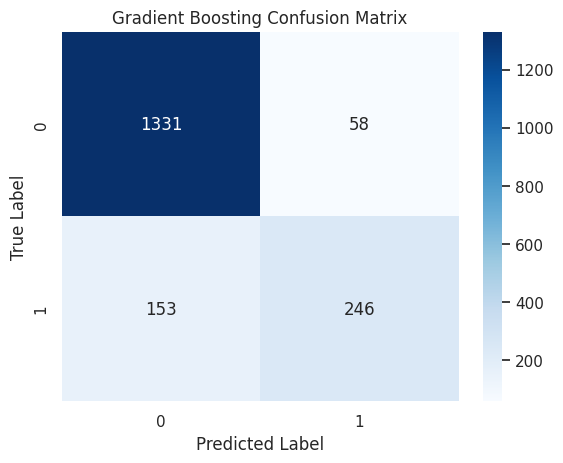

Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1389
           1       0.89      0.67      0.77       399

    accuracy                           0.91      1788
   macro avg       0.90      0.82      0.85      1788
weighted avg       0.91      0.91      0.90      1788



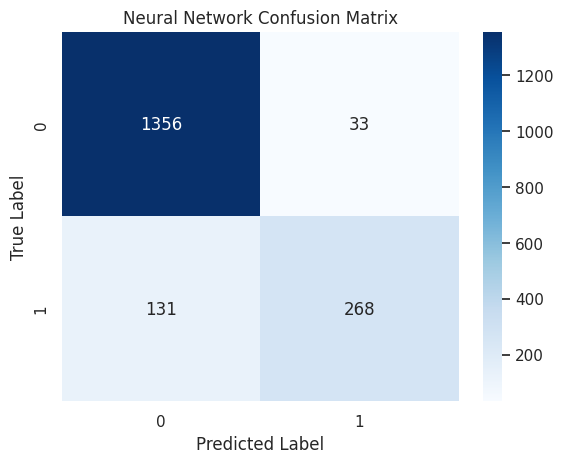

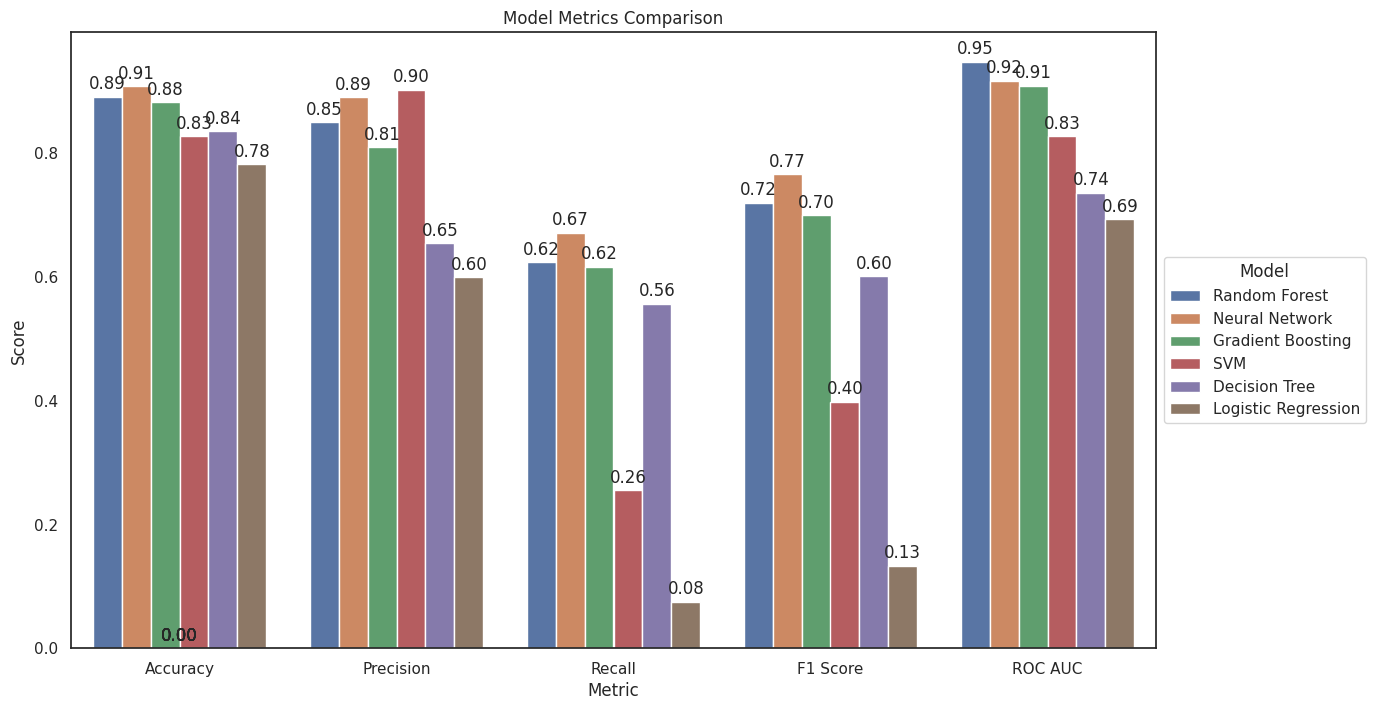

                    Model  Accuracy  Precision    Recall  F1 Score   ROC AUC  \
2           Random Forest  0.891499   0.849829  0.624060  0.719653  0.947955   
896        Neural Network  0.908277   0.890365  0.671679  0.765714  0.917385   
1191       Neural Network  0.908277   0.890365  0.671679  0.765714  0.917385   
1203       Neural Network  0.908277   0.890365  0.671679  0.765714  0.917385   
1202       Neural Network  0.908277   0.890365  0.671679  0.765714  0.917385   
...                   ...       ...        ...       ...       ...       ...   
893        Neural Network  0.908277   0.890365  0.671679  0.765714  0.917385   
4       Gradient Boosting  0.881991   0.809211  0.616541  0.699858  0.908935   
3                     SVM  0.827740   0.902655  0.255639  0.398438  0.827777   
1           Decision Tree  0.835570   0.654867  0.556391  0.601626  0.736079   
0     Logistic Regression  0.782438   0.600000  0.075188  0.133630  0.693202   

                                       

In [33]:
results = evaluate_and_plot_models(X, y)